In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fast')

#Whole data with divisions
df1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160221/20160221_flat.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ter3/20160306/20160306_flat.csv')
df = pd.concat([df1, df2])
images_dir = '/content/drive/MyDrive/ColabNotebooks/Project/Plots'

# **Fluorescence**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'P5ter')

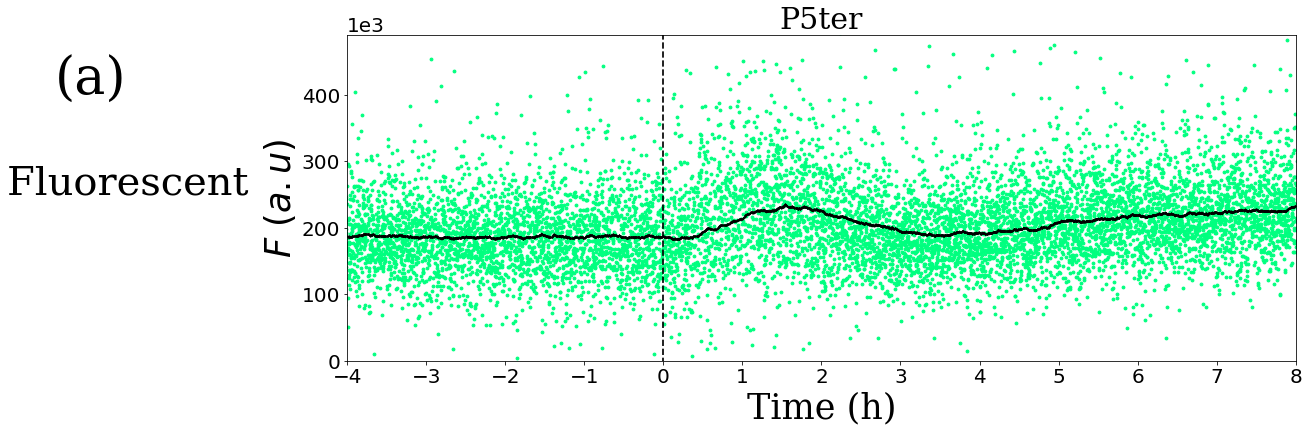

In [2]:
flourescense = df[['fov', 't1Trans']]
flourescense['Absolute fluorescence'] = df.apply(lambda x: x['Itot1'] - x['Itot0'], axis=1)
flourescenseT = flourescense.pivot_table('Absolute fluorescence', index='t1Trans', columns='fov', aggfunc='mean', margins=True)
flourescenseT = flourescenseT.fillna(0)
flourescenseT = flourescenseT['All']
flourescenseT = pd.DataFrame(flourescenseT)
flourescenseT= flourescenseT.reset_index(['t1Trans'])
flourescenseT= flourescenseT[:-1]

#Rolling average
flourescenseT['Rolling average'] = flourescenseT['All'].ewm(span=500).mean()

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=5000000, ymax=6,color='k',  ls='--',lw = 1.7)
plt.scatter(flourescenseT['t1Trans']/60, flourescenseT['All'], color='springgreen', s= 8)
plt.plot(flourescenseT['t1Trans']/60, flourescenseT['Rolling average'],'.', color='k', markersize=1.1)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$F~(a.u)$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3))
plt.ylim(0,490000)
plt.xlim(-4,8)
plt.text(-8.3, 250000, r'Fluorescent ',family="serif", fontsize=40)
plt.text(-7.7, 400000, r'(a)',family="serif", fontsize=52)
plt.title('P5ter', family = 'serif', fontsize = 30)
#plt.savefig(f"{images_dir}/Flourescense.png", bbox_inches="tight", dpi=100)

# **Rate**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'P5ter')

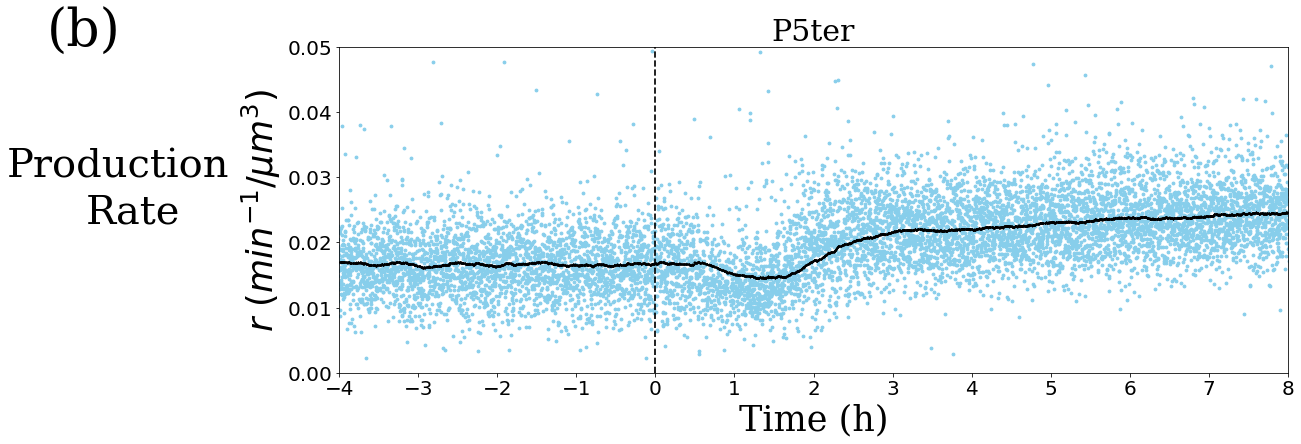

In [3]:
Rate = df[['fov', 't1Trans']]
Rate['Rate'] = df.apply(lambda x: abs(x['Itot0'] - x['Itot1'])/(abs(x['t0Trans'] - x['t1Trans'])*x['V1']), axis=1)
RateT = Rate.pivot_table('Rate', index='t1Trans', columns='fov', aggfunc='mean', margins=True)
RateT = RateT.fillna(0)
RateT = RateT['All']
RateT = pd.DataFrame(RateT)
RateT= RateT.reset_index(['t1Trans'])
RateT= RateT[:-1]

#Rolling average
RateT['Rolling average'] = RateT['All'].ewm(span=500).mean()

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=0.05,color='k',  ls='--',lw = 1.7)
plt.scatter(RateT['t1Trans']/60, RateT['All']/100000, color='skyblue', s= 8)
plt.plot(RateT['t1Trans']/60, RateT['Rolling average']/100000, '.', color='k', markersize=1.1)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$r~(min^{-1}/\mu m^{3})$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ylim(0,0.05)
plt.xlim(-4,8)
plt.text(-7.7, 0.05, r'(b)',family="serif", fontsize=52)
plt.text(-8.2, 0.03, r'Production',family="serif", fontsize=40)
plt.text(-7.2, 0.023, r'Rate',family="serif", fontsize=40)
plt.title('P5ter', family = 'serif', fontsize = 30)
#plt.savefig(f"{images_dir}/Rate.png", bbox_inches = "tight", dpi=100)

# **Number of proteins**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'P5ter')

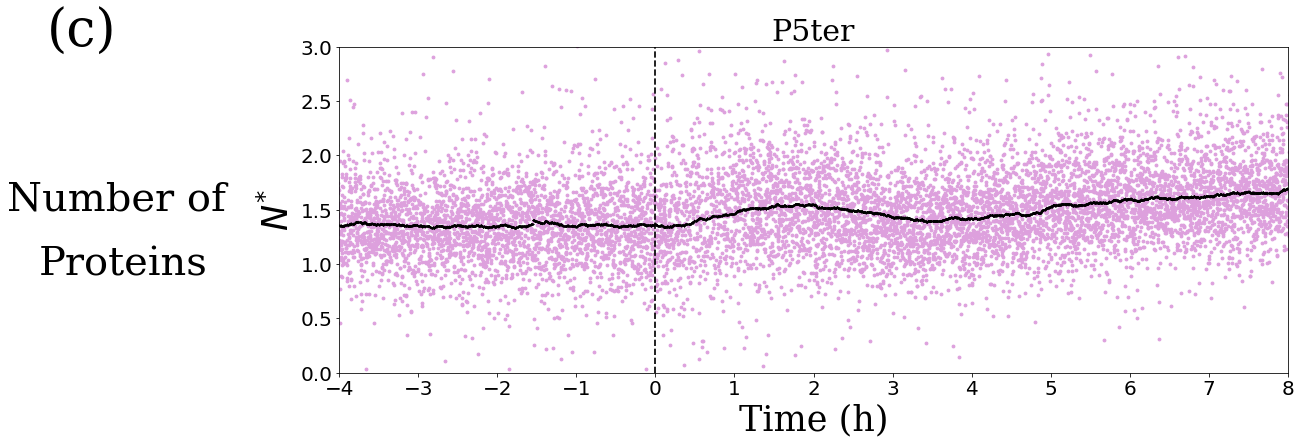

In [4]:
Proteins = df[['fov', 't1Trans']]
Proteins['Absolute fluorescence'] = df.apply(lambda x: (abs(x['Itot0'] - x['Itot1'])/(abs(x['t0Trans'] - x['t1Trans'])*x['V1']*x['expfitBV2']))*abs(x['V1'] - x['V0']), axis=1)
ProteinsT = Proteins.pivot_table('Absolute fluorescence', index='t1Trans', columns='fov', aggfunc='mean', margins=True)
ProteinsT = ProteinsT.fillna(0)
ProteinsT = ProteinsT['All']
ProteinsT = pd.DataFrame(ProteinsT)
ProteinsT= ProteinsT.reset_index(['t1Trans'])
ProteinsT= ProteinsT[:-1]
ProteinsT = ProteinsT[ProteinsT['All']>0]

#Rolling average
ProteinsT['Rolling average'] = ProteinsT['All'].ewm(span=500).mean()

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=5,color='k',  ls='--',lw = 1.7)
plt.scatter(ProteinsT['t1Trans']/60, ProteinsT['All']/100000, color='plum', s= 8)
plt.plot(ProteinsT['t1Trans']/60, ProteinsT['Rolling average']/100000, '.', color='k', markersize=1.1)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$N^{*}$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ylim(0,3)
plt.xlim(-4,8)
plt.text(-7.7, 3, r'(c)',family="serif", fontsize=52)
plt.text(-8.2, 1.5, r'Number of',family="serif", fontsize=40)
plt.text(-7.8, 0.9, r'Proteins',family="serif", fontsize=40)
plt.title('P5ter', family = 'serif', fontsize = 30)
#plt.savefig(f"{images_dir}/NumberOfProteins.png", bbox_inches = "tight", dpi=100)